# IBM Data Science Professional Certificate 
# Capstone Project to Predict Car Accident Severity

In [1]:
#October 2020

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
#import intertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\Mary\Desktop\Data-Collisions.csv")

C:\Users\Mary\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Data Analysis and Preprocessing

In [5]:
df.shape

(194673, 38)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df=df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL']]

In [8]:
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
0,2,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Raining,Wet,Dark - Street Lights On,NaN,NaN,0
2,1,Overcast,Dry,Daylight,NaN,NaN,0
3,1,Clear,Dry,Daylight,NaN,NaN,N
4,2,Raining,Wet,Daylight,NaN,NaN,0


In [9]:
df.dtypes

SEVERITYCODE       int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
INATTENTIONIND    object
UNDERINFL         object
dtype: object

In [ ]:
#Examine Target Variable

In [10]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [ ]:
#dataset will need to be rebalanced since severity code 2 accounts for only 30% of observations

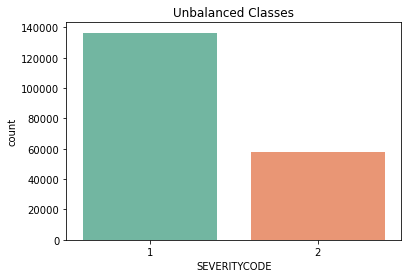

In [11]:
sns.countplot('SEVERITYCODE', data=df, palette="Set2")
plt.title('Unbalanced Classes')
plt.show()

In [12]:
df1_shuffled=df.sample(frac=1,random_state=4)
df1_2=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 2]
df1_1=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 1].sample(n=57159,random_state=42)
df2 = pd.concat([df1_1, df1_2])
df2.shape

(115347, 7)

In [13]:
from sklearn.utils import resample

In [14]:
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]
df_majority_downsample = resample(df_majority, replace=False,n_samples=58188,random_state=123)
df_balanced = pd.concat([df_majority_downsample, df_minority])
df_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

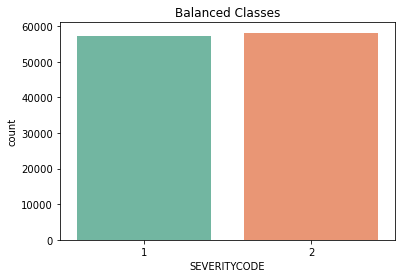

In [15]:
sns.countplot('SEVERITYCODE', data=df2, palette = "Set2")
plt.title('Balanced Classes')
plt.show()

In [ ]:
#Examine Values in Attributes and replace with binary and numerical codes where needed

In [16]:
#Weather Attribute
df_balanced.groupby(['WEATHER'])['SEVERITYCODE'].value_counts (normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.500000
                          2               0.500000
Clear                     2               0.527478
                          1               0.472522
Fog/Smog/Smoke            2               0.526761
                          1               0.473239
Other                     1               0.714286
                          2               0.285714
Overcast                  2               0.519484
                          1               0.480516
Partly Cloudy             2               0.750000
                          1               0.250000
Raining                   2               0.542946
                          1               0.457054
Severe Crosswind          2               0.538462
                          1               0.461538
Sleet/Hail/Freezing Rain  1               0.555556
                          2               0.444444
Snowing                   1               0

In [ ]:
#Change categorical data to numerical for processing.  Numerical code groups are assigned as follows:  
#0=Dry, 1=Wet, 2=Unusual, 3=Other

In [17]:
df_balanced['WEATHER'].replace('Clear', 0, inplace=True)
df_balanced['WEATHER'].replace('Partly Cloudy', 0, inplace=True)
df_balanced['WEATHER'].replace('Overcast', 0, inplace=True)
df_balanced['WEATHER'].replace('Raining', 1, inplace=True)
df_balanced['WEATHER'].replace('Snowing', 1, inplace=True)
df_balanced['WEATHER'].replace('Sleet/Hail/Freezing Rain', 1, inplace=True)
df_balanced['WEATHER'].replace('Blowing Sand/Dirt', 2, inplace=True)
df_balanced['WEATHER'].replace('Severe Crosswind', 2, inplace=True)
df_balanced['WEATHER'].replace('Fog/Smog/Smoke', 2, inplace=True)
df_balanced['WEATHER'].replace('Other', 3, inplace=True)
df_balanced['WEATHER'].replace('Unknown', 3, inplace=True)
df_balanced['WEATHER'].replace(np.nan, 3, inplace=True)
df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1.0,Wet,Dark - Street Lights On,NaN,NaN,0
65280,1,0.0,Dry,Daylight,NaN,NaN,0
86292,1,3.0,Unknown,Unknown,NaN,NaN,N
155111,1,0.0,Dry,Daylight,NaN,NaN,N
64598,1,0.0,Dry,Daylight,NaN,NaN,0


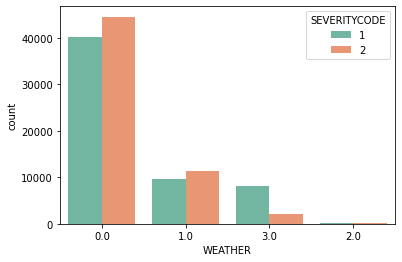

In [18]:
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df_balanced, palette="Set2", order=df_balanced['WEATHER'].value_counts().index)

In [ ]:
#Most car accidents occur in "Dry"/0 weather which includes, Clear, Partly Cloudy and Overcast conditions 72.8%

In [19]:
df_balanced.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()

WEATHER  SEVERITYCODE
0.0      2               44588
         1               40196
1.0      2               11375
         1                9746
2.0      2                 209
         1                 189
3.0      1                8057
         2                2016
Name: SEVERITYCODE, dtype: int64

In [20]:
df_balanced.dtypes

SEVERITYCODE        int64
WEATHER           float64
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
INATTENTIONIND     object
UNDERINFL          object
dtype: object

In [21]:
#Road Condition Attribute
df_balanced.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts (normalize=True)

ROADCOND        SEVERITYCODE
Dry             2               0.527158
                1               0.472842
Ice             1               0.597345
                2               0.402655
Oil             2               0.615385
                1               0.384615
Other           2               0.518072
                1               0.481928
Sand/Mud/Dirt   1               0.510638
                2               0.489362
Snow/Slush      1               0.683712
                2               0.316288
Standing Water  2               0.526316
                1               0.473684
Unknown         1               0.889950
                2               0.110050
Wet             2               0.536359
                1               0.463641
Name: SEVERITYCODE, dtype: float64

In [ ]:
#Change categorical data to numerical for processing.  Numerical code groups are assigned as follows:  
#0=Good, 1=Fair, 2=Poor, 3=Other

In [22]:
df_balanced['ROADCOND'].replace('Dry', 0, inplace=True)
df_balanced['ROADCOND'].replace('Wet', 1, inplace=True)
df_balanced['ROADCOND'].replace('Sand/Mud/Dirt', 1, inplace=True)
df_balanced['ROADCOND'].replace('Oil', 1, inplace=True)
df_balanced['ROADCOND'].replace('Ice', 2, inplace=True)
df_balanced['ROADCOND'].replace('Standing Water', 2, inplace=True)
df_balanced['ROADCOND'].replace('Snow/Slush', 2, inplace=True)
df_balanced['ROADCOND'].replace('Other', 3, inplace=True)
df_balanced['ROADCOND'].replace('Unknown', 3, inplace=True)
df_balanced['ROADCOND'].replace(np.nan, 3, inplace=True)
df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1.0,1.0,Dark - Street Lights On,NaN,NaN,0
65280,1,0.0,0.0,Daylight,NaN,NaN,0
86292,1,3.0,3.0,Unknown,NaN,NaN,N
155111,1,0.0,0.0,Daylight,NaN,NaN,N
64598,1,0.0,0.0,Daylight,NaN,NaN,0


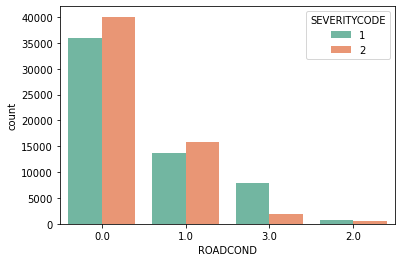

In [23]:
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df_balanced, palette="Set2", order=df_balanced['ROADCOND'].value_counts().index)

In [ ]:
#Most car accidents occur where road conditions are "Good"/0 which denotes the Dry weather condition 65%

In [24]:
df_balanced.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()

ROADCOND  SEVERITYCODE
0.0       2               40064
          1               35936
1.0       2               15802
          1               13658
2.0       1                 793
          2                 470
3.0       1                7801
          2                1852
Name: SEVERITYCODE, dtype: int64

In [25]:
#Light Condition Attribute
df_balanced.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts (normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.614319
                          2               0.385681
Dark - Street Lights Off  1               0.550498
                          2               0.449502
Dark - Street Lights On   1               0.503141
                          2               0.496859
Dark - Unknown Lighting   2               0.571429
                          1               0.428571
Dawn                      2               0.536808
                          1               0.463192
Daylight                  2               0.539054
                          1               0.460946
Dusk                      2               0.541203
                          1               0.458797
Other                     1               0.590551
                          2               0.409449
Unknown                   1               0.900198
                          2               0.099802
Name: SEVERITYCODE, dtype: float64

In [ ]:
#Change categorical data to numerical for processing.  Numerical code groups are assigned as follows: 
#0=light, 1=Partial Light, 2=Dark, 3=Other

In [26]:
df_balanced['LIGHTCOND'].replace('Daylight', 0, inplace=True)
df_balanced['LIGHTCOND'].replace('Dusk', 1, inplace=True)
df_balanced['LIGHTCOND'].replace('Dawn', 1, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - Street Lights On', 1, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - No Street Lights', 2, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - Street Lights Off', 2, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - Unknown Lighting', 2, inplace=True)
df_balanced['LIGHTCOND'].replace('Other', 3, inplace=True)
df_balanced['LIGHTCOND'].replace('Unknown', 3, inplace=True)
df_balanced['LIGHTCOND'].replace(np.nan, 3, inplace=True)
df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1.0,1.0,1.0,NaN,NaN,0
65280,1,0.0,0.0,0.0,NaN,NaN,0
86292,1,3.0,3.0,3.0,NaN,NaN,N
155111,1,0.0,0.0,0.0,NaN,NaN,N
64598,1,0.0,0.0,0.0,NaN,NaN,0


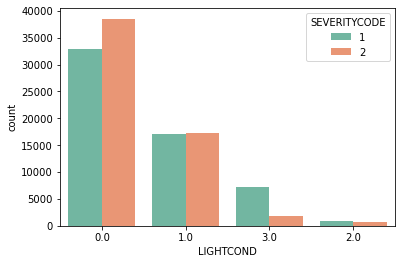

In [27]:
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df_balanced, palette="Set2", order=df_balanced['LIGHTCOND'].value_counts().index)

In [ ]:
#Most Car accidents occur when it is "Light"/0 which represents "Daylight" in the dataset 61.4% 

In [29]:
df_balanced.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts()

LIGHTCOND  SEVERITYCODE
0.0        2               38544
           1               32959
1.0        2               17243
           1               17017
2.0        1                 922
           2                 654
3.0        1                7290
           2                1747
Name: SEVERITYCODE, dtype: int64

In [30]:
#Speeding? Attribute
df_balanced.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts (normalize=True)

SPEEDING  SEVERITYCODE
Y         2               0.590468
          1               0.409532
Name: SEVERITYCODE, dtype: float64

In [31]:
df_balanced['SPEEDING'].replace('Y', 1, inplace=True)
df_balanced['SPEEDING'].replace(np.nan, 0, inplace=True)
df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1.0,1.0,1.0,0.0,NaN,0
65280,1,0.0,0.0,0.0,0.0,NaN,0
86292,1,3.0,3.0,3.0,0.0,NaN,N
155111,1,0.0,0.0,0.0,0.0,NaN,N
64598,1,0.0,0.0,0.0,0.0,NaN,0


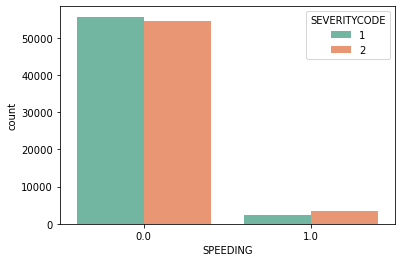

In [32]:
sns.countplot(x='SPEEDING', hue='SEVERITYCODE', data=df_balanced, palette="Set2", order=df_balanced['SPEEDING'].value_counts().index)

In [ ]:
#Most car accidents occur where speeding is not involved.  Speeding accounts for 5.13% of accidents 

In [33]:
df_balanced['SPEEDING'].value_counts()

0.0    110396
1.0      5980
Name: SPEEDING, dtype: int64

In [34]:
#Inattention Indicator Attribute
df_balanced.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts (normalize=True)

INATTENTIONIND  SEVERITYCODE
Y               2               0.557211
                1               0.442789
Name: SEVERITYCODE, dtype: float64

In [35]:
df_balanced['INATTENTIONIND'].replace('Y', 1, inplace=True)
df_balanced['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1.0,1.0,1.0,0.0,0.0,0
65280,1,0.0,0.0,0.0,0.0,0.0,0
86292,1,3.0,3.0,3.0,0.0,0.0,N
155111,1,0.0,0.0,0.0,0.0,0.0,N
64598,1,0.0,0.0,0.0,0.0,0.0,0


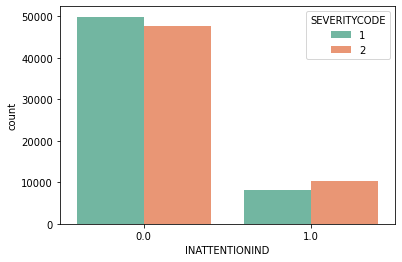

In [36]:
sns.countplot(x='INATTENTIONIND', hue='SEVERITYCODE', data=df_balanced, palette="Set2", order=df_balanced['INATTENTIONIND'].value_counts().index)

In [ ]:
#Most car accidents denote a negative inattention indicator.  Inattention represents 16% of cases 

In [37]:
df_balanced['INATTENTIONIND'].value_counts()

0.0    97717
1.0    18659
Name: INATTENTIONIND, dtype: int64

In [38]:
#Under the Influence Indicator Attribute
df_balanced.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts (normalize=True)

UNDERINFL  SEVERITYCODE
0          1               0.521712
           2               0.478288
1          2               0.612915
           1               0.387085
N          2               0.512950
           1               0.487050
Y          2               0.580539
           1               0.419461
Name: SEVERITYCODE, dtype: float64

In [39]:
df_balanced['UNDERINFL'].replace('Y', 1, inplace=True)
df_balanced['UNDERINFL'].replace('N', 0, inplace=True)
df_balanced['UNDERINFL'].replace('1', 1, inplace=True)
df_balanced['UNDERINFL'].replace('0', 0, inplace=True)
df_balanced['UNDERINFL'].replace(np.nan, 0, inplace=True)
df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1.0,1.0,1.0,0.0,0.0,0.0
65280,1,0.0,0.0,0.0,0.0,0.0,0.0
86292,1,3.0,3.0,3.0,0.0,0.0,0.0
155111,1,0.0,0.0,0.0,0.0,0.0,0.0
64598,1,0.0,0.0,0.0,0.0,0.0,0.0


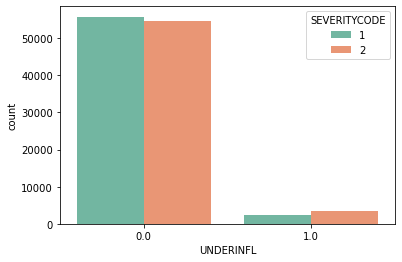

In [40]:
sns.countplot(x='UNDERINFL', hue='SEVERITYCODE', data=df_balanced, palette="Set2", order=df_balanced['UNDERINFL'].value_counts().index)

In [ ]:
#Most car accidents in this dataset do not have a positive under the influence indicator. 
#Drivers where under the influence is positive represent 5.15% of observations

In [41]:
df_balanced.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts (normalize=True)

UNDERINFL  SEVERITYCODE
0.0        1               0.505145
           2               0.494855
1.0        2               0.594856
           1               0.405144
Name: SEVERITYCODE, dtype: float64

In [44]:
df_balanced['UNDERINFL'].value_counts()

0.0    110388
1.0      5988
Name: UNDERINFL, dtype: int64

In [45]:
#df_balanced=df.astype(int)
df_balanced.dtypes

SEVERITYCODE        int64
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
SPEEDING          float64
INATTENTIONIND    float64
UNDERINFL         float64
dtype: object

In [46]:
#convert to integer
df_balanced['WEATHER'] = df_balanced['WEATHER'].astype(int)
df_balanced['ROADCOND'] = df_balanced['ROADCOND'].astype(int)
df_balanced['LIGHTCOND'] = df_balanced['LIGHTCOND'].astype(int)
df_balanced['SPEEDING'] = df_balanced['SPEEDING'].astype(int)
df_balanced['INATTENTIONIND'] = df_balanced['INATTENTIONIND'].astype(int)
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].astype(int)

In [47]:
df_balanced.dtypes

SEVERITYCODE      int64
WEATHER           int32
ROADCOND          int32
LIGHTCOND         int32
SPEEDING          int32
INATTENTIONIND    int32
UNDERINFL         int32
dtype: object

In [53]:
df_balanced.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1,1,1,0,0,0
65280,1,0,0,0,0,0,0
86292,1,3,3,3,0,0,0
155111,1,0,0,0,0,0,0
64598,1,0,0,0,0,0,0


# Establish Feature Set/Module Processing

In [54]:
#Create the feature set
Feature = df_balanced[['WEATHER', 'ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL']]
X = Feature
X[0:5]

,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
25055,1,1,1,0,0,0
65280,0,0,0,0,0,0
86292,3,3,3,0,0,0
155111,0,0,0,0,0,0
64598,0,0,0,0,0,0


In [55]:
y = df_balanced['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [57]:
#Normalize the Data
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.62765435,  0.54322002,  0.5179433 , -0.23274155, -0.43697754,
        -0.23290562],
       [-0.5093927 , -0.59725684, -0.64449995, -0.23274155, -0.43697754,
        -0.23290562],
       [ 2.90174846,  2.82417373,  2.8428298 , -0.23274155, -0.43697754,
        -0.23290562],
       [-0.5093927 , -0.59725684, -0.64449995, -0.23274155, -0.43697754,
        -0.23290562],
       [-0.5093927 , -0.59725684, -0.64449995, -0.23274155, -0.43697754,
        -0.23290562]])

# K Nearest Neighbor(KNN)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train Set:', X_train.shape, y_train.shape)
print('Test Set:', X_test.shape, y_test.shape)

Train Set: (93100, 6) (93100,)
Test Set: (23276, 6) (23276,)


In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
k = 6
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [61]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 1, 1, 1], dtype=int64)

In [62]:
from sklearn import metrics
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train Set Accuracy:  0.5312137486573577
Test Set Accuracy:  0.5302457466918714


In [63]:
 #Calculate different Ks (see what happens)
Ks=15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMX = [];
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.52521911, 0.53269462, 0.53071834, 0.52745317, 0.52796872,
       0.53024575, 0.53273758, 0.531105  , 0.53282351, 0.52878501,
       0.53127685, 0.53119093, 0.5596752 , 0.55628115])

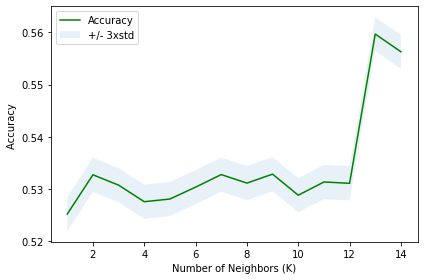

Best Accuracy: 0.5596752019247293 K= 13


In [47]:
#Plot Model with Different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print("Best Accuracy:", mean_acc.max(), "K=", mean_acc.argmax()+1)

In [64]:
#model
KNN_model=KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)
KNN_model

KNeighborsClassifier(n_neighbors=13)

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [72]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [73]:
#Predict
predTree = Tree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[2 1 2 2 2]
[2 1 1 1 2]


In [74]:
from sklearn import metrics

In [75]:
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision Tree's Accuracy:  0.5617391802480451


In [76]:
dtmodel=DecisionTreeClassifier(criterion="entropy", max_depth=6)
dtmodel.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)